# Scratchpad
---

A Scratchpad Python Notebook to test, check, and explore the `trendingtopics` package

### *) Importing libraries and dependencies

In [47]:
import requests
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
from dotenv import load_dotenv
import os
import json
from newsapi import NewsApiClient
import matplotlib.pyplot as plt

### 1) Request from pytrends

In [48]:
pytrends = TrendReq(hl='en-US', tz=360)


In [49]:
kw_list = ['Disasters']

In [93]:
pytrends.build_payload(kw_list, timeframe='today 1-m')

<AxesSubplot: xlabel='date'>

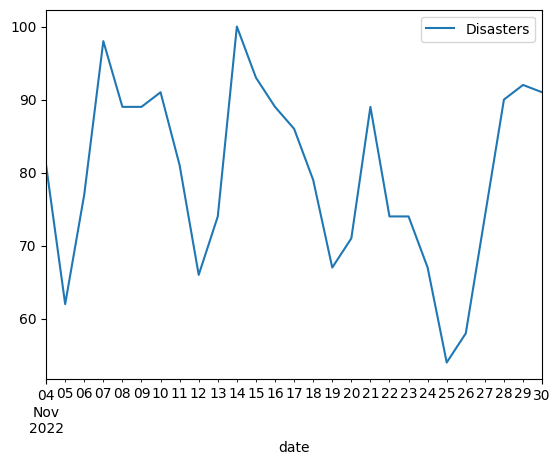

In [94]:
pytrends.interest_over_time().plot()

### 2) Request from Google NEWS API

In [95]:
# Setup API
load_dotenv()
news_api = os.getenv('NEWS_API_KEY')

In [104]:
# Init
newsapi = NewsApiClient(api_key=news_api)
url = f'https://newsapi.org/v2/everything?q=disasters&from=2022-11-04&sortBy=publishedAt&apiKey={news_api}'

url = f'https://newsapi.org/v2/everything?q=disasters&from={date_from}&to={date_to}&sortBy=publishedAt&apiKey={news_api}'

In [105]:
r = requests.get(url)

In [106]:
r.status_code

200

In [107]:
news = r.json()

In [108]:
news_df = pd.DataFrame(news['articles'])

In [101]:
from datetime import date, timedelta

# create a date object for today's date
today = date.today()

# create an empty list to store the dates
date_from = []
date_to = []

# loop over the last 30 days
for i in range(30):
    # create a date object for the current day
    current_date1 = today - timedelta(days=i+1)
    current_date2 = today - timedelta(days=i)

    # add the date to the list of dates
    date_from.append(current_date1)
    date_to.append(current_date2)

In [123]:
news['totalResults']

4804

In [132]:
kw_list = 'disasters'
news_freq = []
for i in range(30):
    url = f'https://newsapi.org/v2/everything?q={kw_list}&from={date_from[i]}&to={date_to[i]}&sortBy=publishedAt&apiKey={news_api}'
    r = requests.get(url)
    news = r.json()
    total_news = news['totalResults']
    news_freq.append(total_news)
    

<AxesSubplot: >

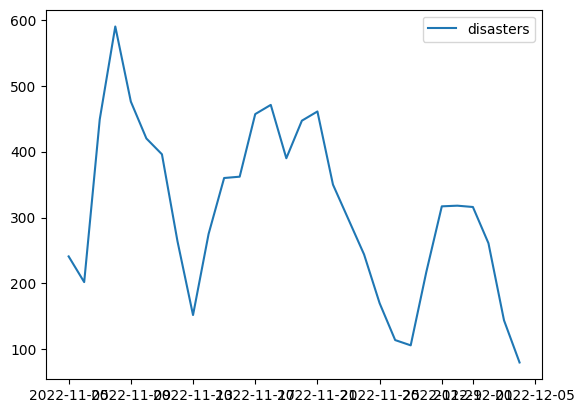

In [140]:
pd.DataFrame(news_freq,index=date_to,columns=[kw_list]).plot()

### 3) Plotting both trends

In [149]:
# Setup dataset to be merged
df1 = pytrends.interest_over_time()
df2 = pd.DataFrame(news_freq,index=date_to,columns=[kw_list])
df2 = df2.rename_axis("date")

# Merged dataset
df_merged = df1.merge(df2,left_index=True, right_index=True)

In [152]:
# Find percentage change
df_merged['demand_change'] = df_merged['disasters'].pct_change()
df_merged['supply_change'] = df_merged['Disasters'].pct_change()

<AxesSubplot: xlabel='date'>

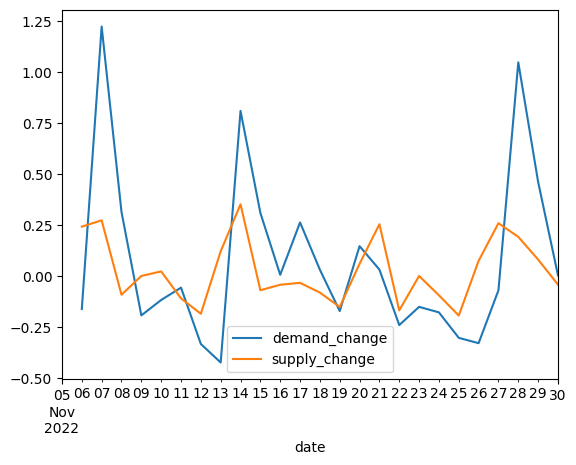

In [156]:
df_merged[['demand_change','supply_change']].plot()